<center> <font size="6"> AE102 : PROJECT </font> <br>
    <font size="5"> The MedAnalysts </font> <br>
    <font size="4">Team : <br> Aayushi Barve : 210010002 <br>
    Apoorva Kanti : 210010013<br>
        Disha Gupta : 210010025<br>
        Ishan Upadhyay : 210010030
    </font></center>

## Introduction

When we thought of a topic for this project, we realized instead of taking a dataset from the internet, we could also collect the data from people we knew, friends and family. That way, we would also understand where and how it was coming from.<br>
Coming to the actual topic, we decided to collect data on seasonal illnesses, preferred treatment methods and self-medication. We had often seen family members or friends avoiding a visit to the doctor unless it was absolutely necessary, so we decided to see if this was something commonly observed or it was just the case with people around us.<br><br>
We created a Google form to collect data, which included fields like age group, health complaints seen in every season, priority order of treatment methods and commonly taken OTC medicines.<br><br>
The link to the form : https://docs.google.com/forms/d/e/1FAIpQLSemDfFQ4T9o6Kn-Ka_3SHuEWY1r-RrZczjK09CgOdLco6brWw/viewform?usp=sf_link <br><br>
After receiving close to 300 responses, we had quite a lot of data to look at. The challenge we faced, however, was to convert this data into numerical quantities. Most of the questions in the form were multiple choice questions, so we had to find a way to conver the answers we got into numerical data. We decided to keep it simple, and define the random variable as the number of illnesses a person suffered from in a particular season, and for the second case, the most preferred treatment method. The values would be the particular index assigned to a specific treatment method.<br><br>
Since there were quite a few different ways the analysis could have been done in, to avoid a lot of confusion we decided to exclude some of the data we collected from the analysis, which was the OTC medicines section. Instead, we focused on just seasonal illnesses and most preferred treatment methods.<br><br>
Once we had converted the data into numerical terms, we plotted it in various formats like histograms, stem plots and joint plots to observe the behaviour of the distribution. After observing these plots, we got a clearer idea of what our hypothesis would be, and how we would test it.<br><br>
We hypothesised that the seasonal illnesses occuring in winters were more than those in monsoon, choosing this as the hypothesis is to get a general idea about people getting more sick in a particular season. The result we obtained was quite surprising. This notebook contains all the code that we used to convert the data into numerical random variables, plotting their distributions and performing hypothesis tests on the variables.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

## Dataset and Random Variables

In [3]:
data=pd.read_csv('TheMedAnalysts.csv')

In [3]:
data.head()

,Timestamp,Name,Age group,Gender,Spring/Autumn,Summer,Monsoon,Winter,#1,#2,#3,#4,Do you take over-the-counter medication?,"If yes, which of these do you take? (If your answer to the previous question was no, you do not need to answer this question)",Unnamed: 14
0,2022/05/03 7:53:59 PM GMT+5:30,Anonymous,19-27 years,Female,Throat infection/cold;Seasonal hairfall,None,None,Common cold/Flu;Viral infections,Home remedies,Over-the-counter medication (Allopathic),Visit a doctor,Ayurvedic medicines,Yes,Cough syrup;Fever reducers,NaN
1,2022/05/03 7:55:55 PM GMT+5:30,SSK,13-18 years,Female,Throat infection/cold,None,Dengue,Common cold/Flu,Home remedies,Ayurvedic medicines,Visit a doctor,Visit a doctor,No,NaN,NaN
2,2022/05/03 7:56:18 PM GMT+5:30,Harsh,19-27 years,Male,Throat infection/cold,Heat stroke,Food poisoning,Common cold/Flu;Viral infections,Over-the-counter medication (Allopathic),Home remedies,Visit a doctor,Ayurvedic medicines,Yes,Pain killers;Cough syrup;Fever reducers;Gastro...,NaN
3,2022/05/03 7:56:54 PM GMT+5:30,Navyansh Mahla,19-27 years,Male,None,None,Food poisoning,Common cold/Flu;Viral infections,Home remedies,Ayurvedic medicines,Over-the-counter medication (Allopathic),Visit a doctor,Yes,Cough syrup;Fever reducers,NaN
4,2022/05/03 7:57:10 PM GMT+5:30,Anshika Raman,13-18 years,Female,Seasonal hairfall,None,Typhoid,Common cold/Flu,Visit a doctor,Home remedies,Ayurvedic medicines,Over-the-counter medication (Allopathic),No,NaN,NaN


The first random variable we have chosen has values equal to the number of times a person falls sick in a particular season. So, the random variable will have the value "0" if the person does not fall sick at all, and will have a positive integer value if he falls sick once or more. <br>
The code below shows 4 differennt lists, one for each season, that records these values.

In [4]:
frequency_list_soa=[]
for i in range(273):
    ill=data.loc[i].at["Spring/Autumn"]
    number=1
    if ill=='None':
        number=0
    else:
        for letter in ill:
            if letter==';':
                number+=1
    frequency_list_soa.append(number)

In [5]:
print(frequency_list_soa)

[2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 7, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 1, 2, 2, 0, 0, 3, 1, 7, 0, 1, 1, 1, 1, 3, 4, 2, 2, 0, 1, 5, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 3, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 3, 0, 2, 1, 1, 1, 0, 0, 3, 3, 0, 2, 0, 3, 1, 1, 2, 1, 1, 1, 0, 1, 4, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 3, 1, 1, 1, 1, 3, 2, 1, 0, 0, 0, 0, 1, 0, 2, 4, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 3, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 4, 1, 1, 2, 2, 2, 2, 2, 0, 1, 3, 1, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 3, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 3, 1, 0, 2, 0, 0, 0, 2, 3, 1, 1, 1, 3, 1, 2]


<StemContainer object of 3 artists>

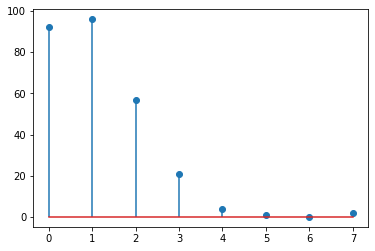

In [6]:
l=len(frequency_list_soa)
count_list=[]
for i in range(8):
    count=0
    for j in range(l):
        if frequency_list_soa[j]==i:
            count+=1
    count_list.append(count)
plt.stem([0,1,2,3,4,5,6,7],count_list)

In [7]:
frequency_list_summer=[]
for i in range(273):
    ill=data.loc[i].at["Summer"]
    number=1
    if ill=='None':
        number=0
    else:
        for letter in ill:
            if letter==';':
                number+=1
    frequency_list_summer.append(number)

In [8]:
print(frequency_list_summer)

[0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 3, 1, 1, 3, 0, 2, 0, 0, 0, 0, 5, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 3, 0, 0, 3, 2, 5, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 1, 2, 2, 3, 0, 1, 1, 0, 2, 1, 1, 0, 0, 3, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 1, 1, 1]


In [9]:
frequency_list_monsoon=[]
for i in range(273):
    ill=data.loc[i].at["Monsoon"]
    number=1
    if ill=='None':
        number=0
    else:
        for letter in ill:
            if letter==';':
                number+=1
    frequency_list_monsoon.append(number)

In [10]:
print(frequency_list_monsoon)

[0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 4, 2, 0, 4, 0, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 3, 0, 0, 5, 0, 0, 3, 0, 6, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 2, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 4, 0, 0, 1, 0, 3, 1, 0, 0, 1, 5, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 0, 2, 2, 0, 1, 4, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 0, 1]


In [11]:
frequency_list_winter=[]
for i in range(273):
    ill=data.loc[i].at["Winter"]
    number=1
    if ill=='None':
        number=0
    else:
        for letter in ill:
            if letter==';':
                number+=1
    frequency_list_winter.append(number)

In [12]:
print(frequency_list_winter)

[2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1, 1, 0, 3, 1, 6, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 0, 2, 2, 6, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 3, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1, 1, 1, 0, 4, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 5, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 3, 1, 2, 2, 3, 0, 2, 1, 1, 2, 0, 4, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 3, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 3, 0, 1, 0, 2, 0, 1, 5, 2, 0, 1, 3, 1, 1, 2, 2, 2, 2, 3, 0, 1, 3, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 3, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 4, 0, 2, 1, 1, 1, 1]


In [13]:
frequency_arr_soa= np.array(frequency_list_soa)
frequency_arr_summer= np.array(frequency_list_summer)
frequency_arr_monsoon= np.array(frequency_list_monsoon)
frequency_arr_winter= np.array(frequency_list_winter)

In [14]:
rows,cols=(273,4)
list=[]
for i in range(rows):
    col=[frequency_arr_soa[i],frequency_arr_summer[i],frequency_arr_monsoon[i],frequency_arr_winter[i]]
    list.append(col)
arr= np.array(list)    

In [15]:
RV1=pd.DataFrame(arr)
RV1.columns=['spring/autumn','summer','monsoon','winter']

RV1 has the collection of the values of the first random variable for all 4 seasons represented in a tabular form.

In [16]:
RV1

,spring/autumn,summer,monsoon,winter
0,2,0,0,2
1,1,0,1,1
2,1,1,1,2
3,0,0,1,2
4,1,0,1,1
...,...,...,...,...
268,1,2,1,2
269,1,0,1,1
270,3,1,1,1
271,1,1,0,1


In [17]:
arr1=data['#1'].to_numpy()
RV2=pd.DataFrame(arr1)
RV2.columns=['most preferred treatment']

In [18]:
RV2

,most preferred treatment
0,Home remedies
1,Home remedies
2,Over-the-counter medication (Allopathic)
3,Home remedies
4,Visit a doctor
...,...
268,Home remedies
269,Home remedies
270,Home remedies
271,Home remedies


For the second random variable, we have assigned values of 1,2,3 and 4 to home remedies, ayurvedic medicines, OTC medication and visiting a doctor respectively. After going through the array and assigning appropriate values, these have been collected in the list "treatment_list" as displayed below.

In [19]:
treatment_list=[]
for i in range(199):
    if arr1[i]=='Home remedies':
        treatment_list.append(1)
    elif arr1[i]=='Ayurvedic medicines':
        treatment_list.append(2)
    elif arr1[i]=='Over-the-counter medication (Allopathic)':
        treatment_list.append(3)
    else:
        treatment_list.append(4)    
print(treatment_list) 
treatment_arr=np.array(treatment_list) 

[1, 1, 3, 1, 4, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 3, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 4, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 1, 4, 1, 1, 4, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 4, 4, 2, 1, 4, 4, 1, 1, 1, 4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


## Description of our data

Given the values of the random variables, the next step is to look at quantities like the mean, maximum and minimum.

In [41]:
mean_soa= np.mean(frequency_arr_soa)
mean_summer=np.mean(frequency_arr_summer)
mean_monsoon= np.mean(frequency_arr_monsoon)
mean_winter= np.mean(frequency_arr_winter)
mean_treatment=np.mean(treatment_arr)

In [42]:
min_soa= np.min(frequency_arr_soa)
min_summer=np.min(frequency_arr_summer)
min_monsoon= np.min(frequency_arr_monsoon)
min_winter= np.min(frequency_arr_winter)
min_treatment=np.min(treatment_arr)

In [43]:
max_soa= np.max(frequency_arr_soa)
max_summer=np.max(frequency_arr_summer)
max_monsoon= np.max(frequency_arr_monsoon)
max_winter= np.max(frequency_arr_winter)
max_treatment=np.max(treatment_arr)

In [44]:
array=[[mean_soa,mean_summer,mean_monsoon,mean_winter,mean_treatment],[min_soa,min_summer,min_monsoon,min_winter,min_treatment],[max_soa,max_summer,max_monsoon,max_winter,max_treatment]]

In [45]:
description=pd.DataFrame(array)
description.columns=['spring/autumn','summer','monsoon','winter','treatment method number']
description.index=['mean','min','max']
description

,spring/autumn,summer,monsoon,winter,treatment method number
mean,1.128205,0.805861,0.659341,1.223443,1.638191
min,0.000000,0.000000,0.000000,0.000000,1.000000
max,7.000000,5.000000,6.000000,6.000000,4.000000


## Visualising the Random Variables

The first set of histograms corresponds to the first random variable, that is the frequency of falling ill in a particular season.

Text(0, 0.5, 'Frequency of diseases occuring in Spring/Autumn')

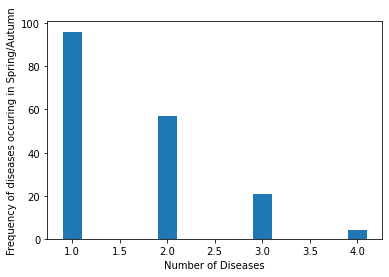

In [46]:
plt.hist(frequency_arr_soa, range=(0.5,4.5), bins=4, rwidth=0.2)
plt.xlabel('Number of Diseases')
plt.ylabel('Frequency of diseases occuring in Spring/Autumn')

Text(0, 0.5, 'Frequency of diseases occuring in Summer')

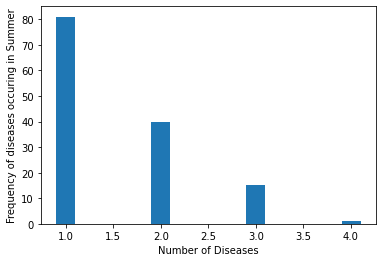

In [47]:
plt.hist(frequency_arr_summer, range=(0.5,4.5), bins=4, rwidth=0.2)
plt.xlabel('Number of Diseases')
plt.ylabel('Frequency of diseases occuring in Summer')

Text(0, 0.5, 'Frequency of diseases occuring in Winter')

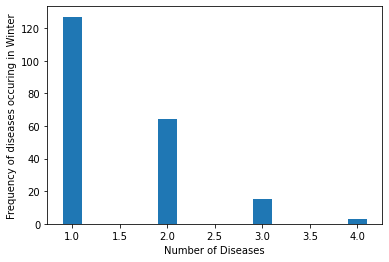

In [48]:
plt.hist(frequency_arr_winter, range=(0.5,4.5), bins=4, rwidth=0.2)
plt.xlabel('Number of Diseases')
plt.ylabel('Frequency of diseases occuring in Winter')

Text(0, 0.5, 'Frequency of diseases occuring in Monsoon')

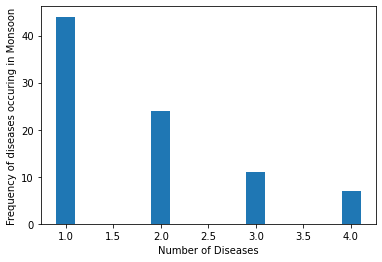

In [49]:
plt.hist(frequency_arr_monsoon, range=(0.5,4.5), bins=4, rwidth=0.2)
plt.xlabel('Number of Diseases')
plt.ylabel('Frequency of diseases occuring in Monsoon')

The next set of plots is the distribution the dataset would have, had it been continuous.

C:\Users\Aayushi Barve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

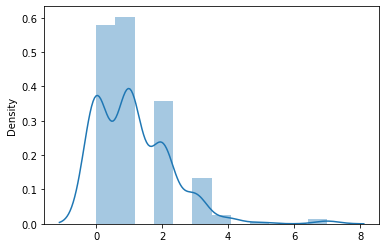

In [50]:
sns.distplot(frequency_arr_soa)

C:\Users\Aayushi Barve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

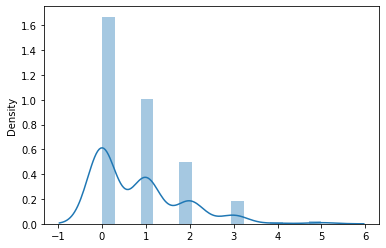

In [51]:
sns.distplot(frequency_arr_summer)

C:\Users\Aayushi Barve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

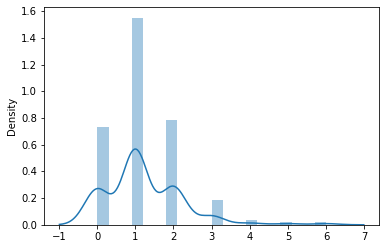

In [52]:
sns.distplot(frequency_arr_winter)

C:\Users\Aayushi Barve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

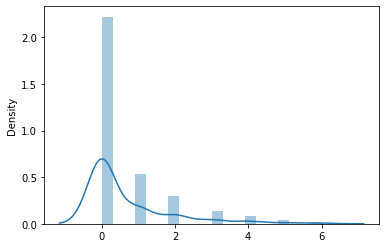

In [53]:
sns.distplot(frequency_arr_monsoon, )

The next set of plots includes joint plots of the random variable, taken two seasons at a time.

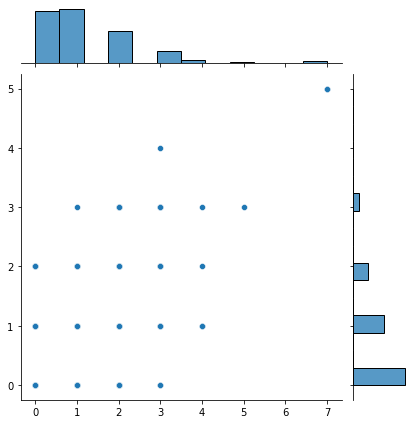

In [55]:
sns.jointplot(x=frequency_arr_soa, y=frequency_arr_summer)

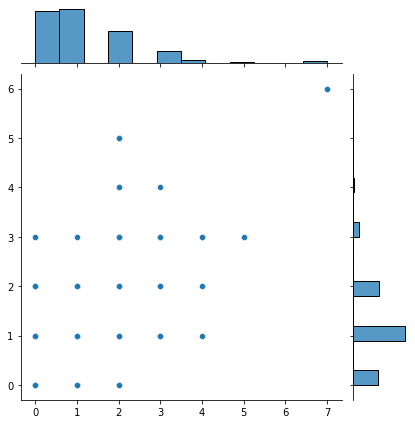

In [56]:
sns.jointplot(x=frequency_arr_soa, y=frequency_arr_winter)

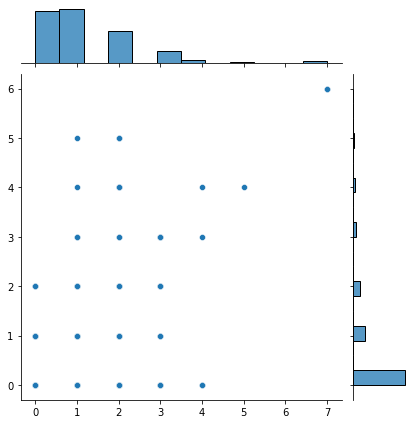

In [55]:
sns.jointplot(x=frequency_arr_soa, y=frequency_arr_monsoon)

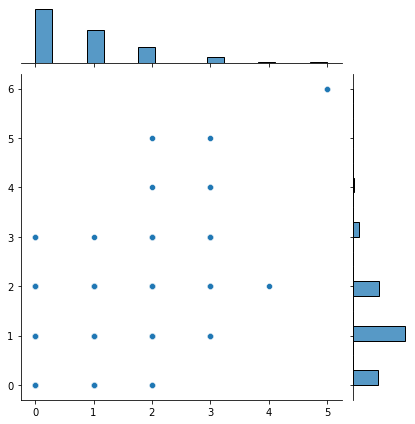

In [56]:
sns.jointplot(x=frequency_arr_summer, y=frequency_arr_winter)

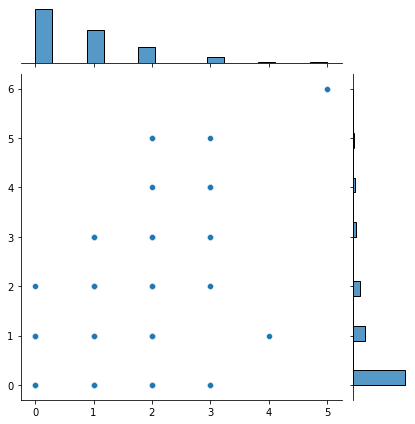

In [57]:
sns.jointplot(x=frequency_arr_summer, y=frequency_arr_monsoon)

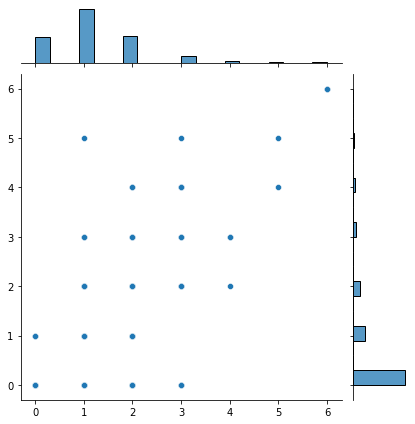

In [58]:
sns.jointplot(x=frequency_arr_winter, y=frequency_arr_monsoon)

The below plots correspond to the second random variable, which is the most preferred treatment method.<br>
1: Home remedies <br>
2: Ayurvedic medicines <br>
3: Over-the-counter medication (Allopathic) <br>
4: Visit a doctor

Text(0, 0.5, 'Number of people')

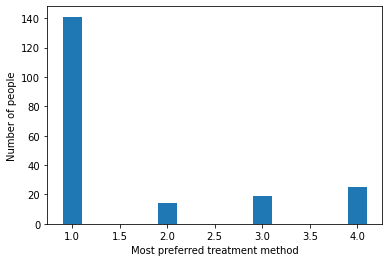

In [58]:
plt.hist(treatment_list, range=(0.5,4.5), bins=4, rwidth=0.2)
plt.xlabel('Most preferred treatment method')
plt.ylabel('Number of people')

C:\Users\Aayushi Barve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

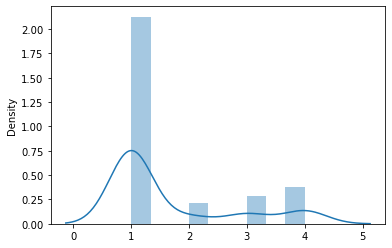

In [59]:
sns.distplot(treatment_list)

## Hypotheses Testing

We will see that if there is any comparison between the number of people falling ill in winters versus monsoon.

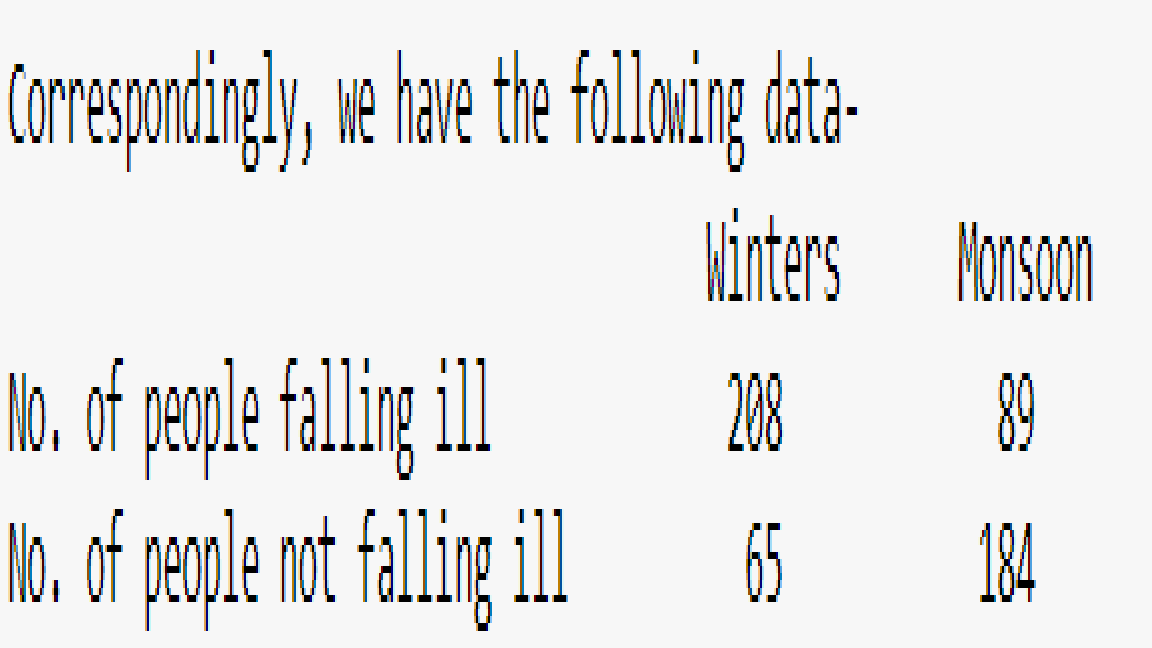

The random variable x will take two values, i.e. '0' for not falling ill and '1' for falling ill.

Hence, we get mean for winters as 

No. of people falling ill/total number of people surveyed = 208/273

Similarly for monsoon, we get mean = 89/273

Formulation of Hypothesis-

A.

Null Hypothesis: [mean(winters) - mean(monsoon)] <= 0

Alternate Hypothesis: [mean(winters) - mean(monsoon)] > 0

Qualitative description of our Hypothesis -

Null Hypothesis: We assume that the people fall ill equally or less in winters and   monsoon and there is NO significant difference between the average number of people falling ill for a given dataset.

Alternate Hypothesis: People fall ill more in one particular season than another and there IS a significant amount of difference between averages of two seasons.

B.

We are taking the significance level alpha = 0.05

C.

Testing variable Z = 11.37

D.

P- value (z<=11.73) = 1-4.473e-32

Comparison between P-value and Significance level(5%) 

1. If p-value < alpha

Conclusion: Reject the null hypothesis ( The number of people falling ill in winters is more than that in monsoon)

2. if p-value>alpha

Conclusion: Fail to reject the null hypothesis ( The number of people falling ill in winters is less than that in monsoon)

E.

We can see that p-value > alpha, hence, we fail to reject the null hypothesis!

## Conclusion

This project gave us a completely different perspective on how complex data sets are analyzed and how we can draw various inferences from them. For the particular hypothesis we had taken, one might say by just looking at the data that people are more likely to fall ill in winters than in monsoons, but after actually calculating the p-value, the surprising result we obtain is that this is not the case, and this is not a valid conclusion to come to. We were able to look at a variety of ways to visualize the same data set and compare it to others using python, which proved to be a very useful tool in our analysis.
We learned that the conclusions that we come to just by looking at a particular histogram might not be the same as the ones we come to by rigorously testing the hypotheses we formulated. <br><br>
While ideating the project and deciding the topic, it felt like we had a pretty clear idea of what we were going to analyze and what we were going to compare, but when it actually came to defining random variables and making the quantities we had decided to observe measurable, we struggled with converting our data to numerical quantities that would actually have meaning when operated upon. It was also a bit tough to test our hypothesis since we didn't have a great idea of what the distribution of our test statistic would look like, but nevertheless, overcoming these problems and reaching the result was worth it.<br><br>
We would like to thank Prof. Amuthan A Ramabathiran for giving us the opportunity to do this project despite the short duration of this semester and helping us practice all the concepts we had learned so far in the course in an application of our choice. It was a great experience and we will surely remember this for a very long time

### Contributions:
Aayushi Barve: Code for extraction of random variables from textual data<br>
Apoorva Kanti: Code for description of data, representing random variables in tabular form<br>
Disha Gupta: Hypothesis testing<br>
Ishan Upadhyay: Code for plotting distributions<br>
Google form was collaborated on by everyone.